In [24]:
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import pandas as pd

import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

In [25]:
folder = "../build/"
all_folders = glob.glob(os.path.join(folder, "fbmc_*/"))
all_folders.sort(key=os.path.getmtime, reverse=True)
print("Recent simulation folders:")
for f in all_folders[:5]:
    print(f)


Recent simulation folders:
../build/fbmc_Si_300.0_30000/
../build/fbmc_Si_300.0_20000/
../build/fbmc_Si_300.0_3000/
../build/fbmc_Si_300.0_2000/
../build/fbmc_Si_300.0_300/


In [26]:
def fermi_dirac(E, Ef=0.562161, T=300):
    kB = 8.617333262145e-5  # eV/K
    return 1.0 / (np.exp((E - Ef) / (kB * T)) + 1.0)

Field: 3.00e+04 V/m, Mean energy: 0.233233 eV, Mean velocity norm: 1.268496e+04 m/s, Mean ionization coeff: 0.000e+00 1/s
Field: 2.00e+04 V/m, Mean energy: 0.170444 eV, Mean velocity norm: 1.329181e+04 m/s, Mean ionization coeff: 0.000e+00 1/s
Field: 3.00e+03 V/m, Mean energy: 0.071381 eV, Mean velocity norm: 1.901621e+04 m/s, Mean ionization coeff: 0.000e+00 1/s
Field: 2.00e+03 V/m, Mean energy: 0.061063 eV, Mean velocity norm: 1.544238e+04 m/s, Mean ionization coeff: 0.000e+00 1/s
Field: 3.00e+02 V/m, Mean energy: 0.044316 eV, Mean velocity norm: 1.777194e+04 m/s, Mean ionization coeff: 0.000e+00 1/s
Field: 2.00e+02 V/m, Mean energy: 0.044165 eV, Mean velocity norm: 2.315232e+04 m/s, Mean ionization coeff: 0.000e+00 1/s
Field: 5.00e+04 V/m, Mean energy: 0.345335 eV, Mean velocity norm: 1.149789e+04 m/s, Mean ionization coeff: 0.000e+00 1/s
Field: 1.00e+04 V/m, Mean energy: 0.120334 eV, Mean velocity norm: 1.091247e+04 m/s, Mean ionization coeff: 0.000e+00 1/s
Field: 5.00e+03 V/m, Mea

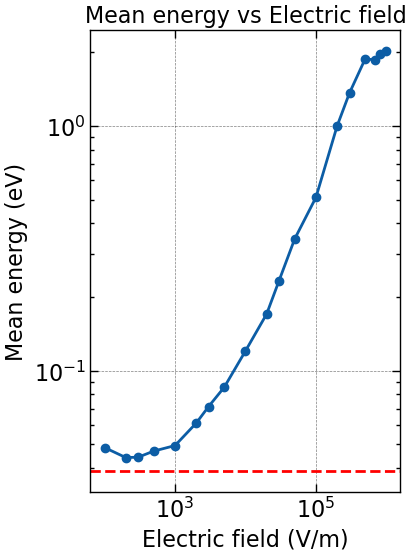

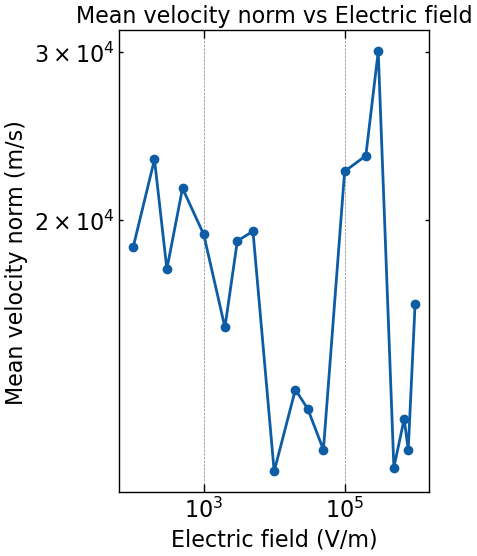

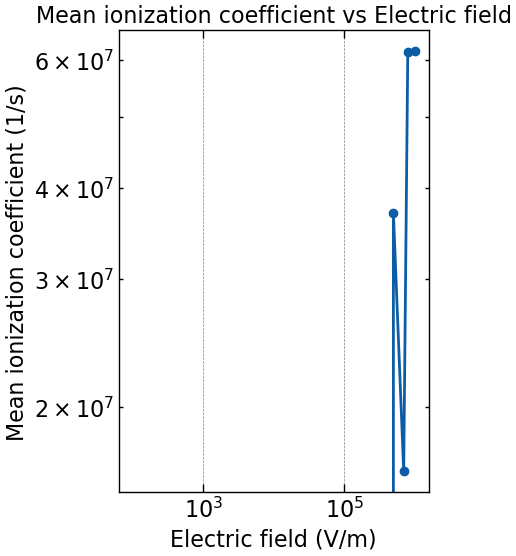

In [30]:
kB = 8.617333262145e-5  # eV/K
T = 300  # K
thermal_energy = (3.0/2.0) * kB * T

list_fields = []
list_mean_energies = []
list_mean_velocities = []
list_ionization_coeffs = []
for folder in all_folders[:]:
    all_files = glob.glob(os.path.join(folder, "simulation_result*_stats.csv"))
    # sort files by modification time
    all_files.sort(key=os.path.getmtime, reverse=True)
    field = float(folder.split("/")[-2].split("_")[-1])
    list_fields.append(field)
    if len(all_files) == 0:
        print(f"No stats file found in {folder}")
        continue
    stats_file = all_files[0]
    mean_energy_eV,mean_velocity_norm_m_per_s,mean_ionization_coeff_1_per_s = np.loadtxt(stats_file, skiprows=1, delimiter=',')
    list_mean_energies.append(mean_energy_eV)
    list_mean_velocities.append(mean_velocity_norm_m_per_s)
    list_ionization_coeffs.append(mean_ionization_coeff_1_per_s)
    print(f"Field: {field:.2e} V/m, Mean energy: {mean_energy_eV:.6f} eV, Mean velocity norm: {mean_velocity_norm_m_per_s:.6e} m/s, Mean ionization coeff: {mean_ionization_coeff_1_per_s:.3e} 1/s")

argsort_fields = np.argsort(list_fields)
list_fields = np.array(list_fields)[argsort_fields]
list_mean_energies = np.array(list_mean_energies)[argsort_fields]
list_mean_velocities = np.array(list_mean_velocities)[argsort_fields]
list_ionization_coeffs = np.array(list_ionization_coeffs)[argsort_fields]


# Plot mean energy vs field
fig, ax = plt.subplots( figsize=(4, 6))
ax.plot(list_fields, list_mean_energies, marker='o')
ax.axhline(thermal_energy, color='r', linestyle='--', label=f'Thermal energy ({thermal_energy:.3f} eV)')
ax.set_xlabel('Electric field (V/m)')
ax.set_ylabel('Mean energy (eV)')
ax.set_title('Mean energy vs Electric field')
ax.set_xscale('log')
ax.set_yscale('log')


fig, ax = plt.subplots( figsize=(4, 6))
ax.plot(list_fields, list_mean_velocities, marker='o')
ax.set_xlabel('Electric field (V/m)')
ax.set_ylabel('Mean velocity norm (m/s)')
ax.set_title('Mean velocity norm vs Electric field')
ax.set_xscale('log')
ax.set_yscale('log')


fig, ax = plt.subplots( figsize=(4, 6))
ax.plot(list_fields, list_ionization_coeffs, marker='o')
ax.set_xlabel('Electric field (V/m)')
ax.set_ylabel('Mean ionization coefficient (1/s)')
ax.set_title('Mean ionization coefficient vs Electric field')
ax.set_xscale('log')
ax.set_yscale('log')